In [1]:
from ngsaddon import KrylovSolver
from ngsaddon.dff import Filter, FilterGenerator
from ngsaddon.negative_laplacian import s,m
from ngsolve import *
from netgen.geom2d import SplineGeometry
from ngsolve.webgui import Draw
import numpy as np

Note: Fourier method works for negative Laplacian problem only!


<Axes: title={'center': 'FOURIER Filter on (0, 357.14285714285717): L = 100, $\\tau$ = 0.0056'}>

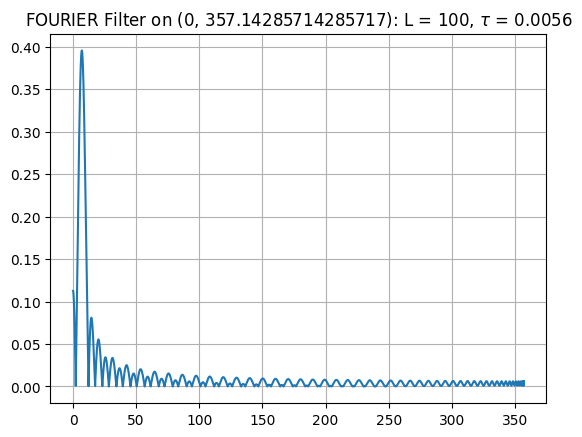

In [2]:
tau = 0.0056        # controlled interval up to omega_end = 360
L = 100

om_min_1, om_max_1 = 6, 8
alpha1 = FilterGenerator(L, tau, om_min_1, om_max_1, 2/tau).fourier()
alpha1.plot()

In [3]:
geo = SplineGeometry()
p1,p2,p3,p4,p5 = [ geo.AppendPoint(x,y) for x,y in [(0,0), (1,0), (0.8,0.4), (1,1), (0,1)] ]
geo.Append (["line", p1, p2], bc="2")
geo.Append (["line", p2, p3], bc="2")
geo.Append (["line", p3, p4], bc="2")
geo.Append (["line", p4, p5], bc="2")
geo.Append (["line", p5, p1], bc="1")
#geo.Append (["spline3", p2,p3,p4])
#geo.Append (["spline3", p4,p5,p1])

#print("generating mesh...")
#mesh = Mesh(geo.GenerateMesh(maxh=0.05))
mesh = Mesh(unit_square.GenerateMesh(maxh=0.05))
#print("mesh generated...")
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [4]:
mesh.GetBoundaries()

('bottom', 'right', 'top', 'left')

Triangularization done after 0.02378 seconds:
	1965 degrees of freedom.
Discretization matrices computed after 0.33953 seconds.
Krylov iteration done after 26.64686 seconds.


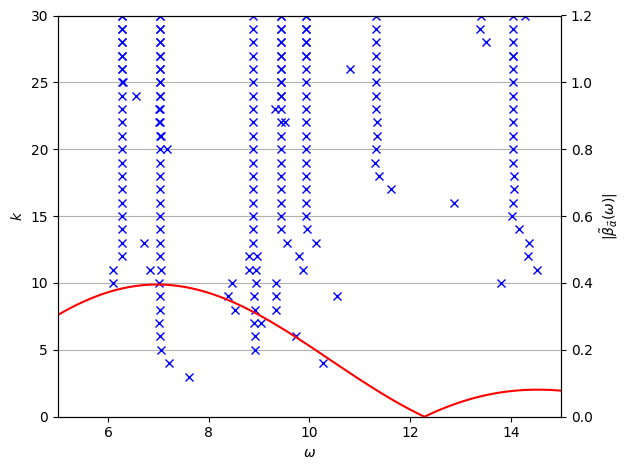

In [5]:
solver = KrylovSolver(s, m, mesh, L, tau, alpha1, m_max = 30)
solver.discretize(order=2)
solver.solve()
solver.plot(5, 15, "")

In [6]:
eigval, eigvec = solver.get_single_result(7*7, -1)
print(eigval)
solution = GridFunction(solver.fes, multidim=solver.mesh.nv)
solution.vecs[0][:] = eigvec
Draw(solution, mesh, deformation=True)

49.34859119887268


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene